In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [3]:
data_path = 'Fish_Dataset/Fish_Dataset'
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 14400 images belonging to 9 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3600 images belonging to 9 classes.


In [6]:
# Создание модели AlexNet
def build_alexnet_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((3, 3), strides=2),
        
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3, 3), strides=2),
        
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3, 3), strides=2),
        
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (227, 227, 3)
num_classes = train_generator.num_classes

model = build_alexnet_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5
)

Epoch 1/5
450/450 [==============================] - 579s 1s/step - loss: 3.3629 - accuracy: 0.2274 - val_loss: 2.2433 - val_accuracy: 0.2062
Epoch 2/5
450/450 [==============================] - 579s 1s/step - loss: 2.0813 - accuracy: 0.1974 - val_loss: 2.0845 - val_accuracy: 0.2249
Epoch 3/5
450/450 [==============================] - 583s 1s/step - loss: 2.0449 - accuracy: 0.2042 - val_loss: 2.0691 - val_accuracy: 0.2414
Epoch 4/5
450/450 [==============================] - 593s 1s/step - loss: 2.0260 - accuracy: 0.1991 - val_loss: 2.0503 - val_accuracy: 0.1696
Epoch 5/5
450/450 [==============================] - 609s 1s/step - loss: 1.9819 - accuracy: 0.2046 - val_loss: 2.0506 - val_accuracy: 0.1780


113/113 [==============================] - 39s 343ms/step - loss: 2.0509 - accuracy: 0.1781
Validation Accuracy: 0.18


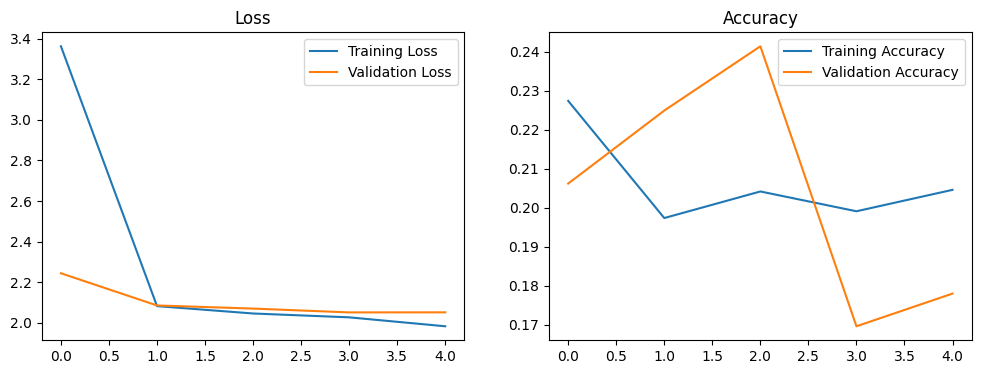

In [16]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

# Построение графиков обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

В данном случае результат вышел плохим. Возможно, AlexNet не подходит для данного датасета. Так же обучение длилось слишком долго, поэтому я оставила 5 epochs. Каждый epoch занимал около 10 минут